In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [3]:
main_path = 'D:\\Downloads\\'
df = pd.read_csv(main_path + 'patient-data.csv')
# display(df)

# check number  of columns and rows in the data
print(df.shape)


# check number of missing values
print(df.isnull().sum().sum(), "total missing values")
print(df.isnull().sum()) #per column

(2371, 25)
24 total missing values
p01        0
p02        0
p03        1
p04        1
p05        1
p06        1
p07        1
p08        1
p09        1
p10        1
p11        1
p12        1
p13        1
p14        1
p15        2
p16        2
p17        1
p18        1
p19        1
p20        1
p21        1
p22        1
p23        0
p24        0
Ailment    2
dtype: int64


In [14]:
# find out the level of measurement

def detect_level_of_measurement(series):
    if series.dtype == 'object' or series.dtype.name == 'category':
        # Check if ordinal category
        if hasattr(series.dtype, 'ordered') and series.dtype.ordered:
            return "Ordinal"
        return "Nominal"

    # If numeric
    if pd.api.types.is_numeric_dtype(series):
        unique_vals = series.dropna().unique()
        # Only two unique values => probably nominal (binary flag)
        if len(unique_vals) == 2:
            return "Nominal (binary)"
        # Check if values can be considered ratio (non-negative + meaningful zero)
        if (series.dropna() >= 0).all():
            return "Ratio"
        # Otherwise numeric but negative allowed → often interval scale
        return "Interval"
    # If datetime
    if pd.api.types.is_datetime64_any_dtype(series):
        return "Interval (datetime)"
    # Fallback
    return "Unknown"

level_map = {}

for col in df.columns:
    level_map[col] = detect_level_of_measurement(df[col])

levels_df = pd.DataFrame.from_dict(level_map, orient='index', columns=['Level of Measurement'])
display(levels_df)

Level of Measurement
p01                    Ratio
p02                    Ratio
p03                    Ratio
p04                    Ratio
p05                    Ratio
p06                    Ratio
p07                    Ratio
p08                    Ratio
p09                    Ratio
p10                    Ratio
p11                    Ratio
p12                    Ratio
p13                    Ratio
p14                    Ratio
p15                    Ratio
p16                    Ratio
p17                    Ratio
p18                    Ratio
p19                    Ratio
p20                    Ratio
p21                    Ratio
p22                    Ratio
p23                    Ratio
p24                    Ratio
Ailment              Nominal

In [ ]:
def descriptive_stats_by_level(df, levels_df):
    results = {}

    for col, level in levels_df['Level of Measurement'].items():
        series = df[col].dropna()

        # NOMINAL
        if "Nominal" in level:
            results[col] = {
                "level": level,
                "count": series.count(),
                "unique_categories": series.nunique(),
                "mode": series.mode().iloc[0] if not series.mode().empty else None,
                "frequency_table": series.value_counts().to_dict(),
                "percent_table": (series.value_counts(normalize=True) * 100).round(2).to_dict()
            }

        # ORDINAL
        elif "Ordinal" in level:
            results[col] = {
                "level": level,
                "count": series.count(),
                "unique_categories": series.nunique(),
                "mode": series.mode().iloc[0] if not series.mode().empty else None,
                "median": series.median(),
                "frequency_table": series.value_counts().to_dict(),
                "percent_table": (series.value_counts(normalize=True) * 100).round(2).to_dict()
            }

        # INTERVAL
        elif "Interval" in level:
            results[col] = {
                "level": level,
                "count": series.count(),
                "mean": series.mean(),
                "std_dev": series.std(),
                "min": series.min(),
                "q1": series.quantile(0.25),
                "median": series.median(),
                "q3": series.quantile(0.75),
                "max": series.max()
            }

        # RATIO
        elif "Ratio" in level:
            mean_val = series.mean()
            std_val = series.std()

            results[col] = {
                "level": level,
                "count": series.count(),
                "mean": mean_val,
                "std_dev": std_val,
                "min": series.min(),
                "q1": series.quantile(0.25),
                "median": series.median(),
                "q3": series.quantile(0.75),
                "max": series.max(),
                "coefficient_of_variation": (std_val / mean_val) if mean_val != 0 else None
            }

        # Unknown / fallback
        else:
            results[col] = {
                "level": level,
                "message": "No descriptive statistics rule defined for this level."
            }

    return results
descriptive_results = descriptive_stats_by_level(df, levels_df)

desc_table = pd.DataFrame(descriptive_results).T
display(desc_table)

level count           mean       std_dev       min           q1  \
p01        Ratio  2371       95.72359     18.391307      70.0    79.045276   
p02        Ratio  2371     157.056068     20.086634     125.0   140.428465   
p03        Ratio  2370      15.875821      1.108117      13.5      14.8411   
p04        Ratio  2370  299642.033487  92072.554351  150000.0  207236.9042   
p05        Ratio  2370    7576.392817   1975.407145    4000.0  5779.743222   
p06        Ratio  2370       4.781409      0.334514       4.2     4.475088   
p07        Ratio  2370      45.176374       4.13093      38.0    42.006265   
p08        Ratio  2370      89.368838      5.810423      80.0    85.074023   
p09        Ratio  2370       30.01276      1.964813      27.0    28.292545   
p10        Ratio  2370      34.288155      1.128564      32.0    33.440483   
p11        Ratio  2370      13.853883      5.197321       5.0     8.966785   
p12        Ratio  2370      21.549882      1.757576      18.5    20.182471   
p13        Ratio  2370     103.698003      8.497371      90.0    96.340427   
p14        Ratio  2370      68.951467       5.34861      60.0    63.725242   
p15        Ratio  2369      88.251874     26.647529      50.0    68.522902   
p16        Ratio  2369        4.90499      0.565004       4.0     4.369382   
p17        Ratio  2370      94.604228     15.925514      70.0    81.656821   
p18        Ratio  2370      50.659141      5.686841      40.0    45.463188   
p19        Ratio  2370      23.748406      8.590197      10.0    16.539442   
p20        Ratio  2370      23.445505       7.40585      10.0    16.927927   
p21        Ratio  2370       81.20041     11.370365      60.0     70.24456   
p22        Ratio  2370       0.868532      0.152437       0.6     0.727196   
p23        Ratio  2371        0.01851      0.010415       0.0     0.011663   
p24        Ratio  2371       1.610787      0.919862       0.0     0.723767   
Ailment  Nominal  2369            NaN           NaN       NaN          NaN   

              median           q3       max coefficient_of_variation  \
p01        94.910515   111.766345     140.0                 0.192129   
p02       157.334147   172.881629     200.0                 0.127895   
p03        15.976076    16.716185      17.5                 0.069799   
p04      308502.9216  375652.9504  450000.0                 0.307275   
p05      7692.153435  9232.441784   11000.0                 0.260732   
p06         4.731108     5.078057       5.4                 0.069961   
p07        44.982337    48.754763      52.0                  0.09144   
p08        88.564827    94.243097     100.0                 0.065016   
p09        29.618746    31.846506      33.0                 0.065466   
p10        34.464026    35.032851      36.0                 0.032914   
p11        13.806624    18.302064      25.0                 0.375153   
p12        21.608173    22.752112      24.9                 0.081559   
p13        102.86858   110.953944     120.0                 0.081943   
p14        70.092141    74.160955      80.0                 0.077571   
p15        82.282068   110.705664     150.0                 0.301949   
p16         4.963892     5.362492       6.0                  0.11519   
p17        93.982213   106.078371     130.0                 0.168338   
p18        49.968044    55.577814      60.0                 0.112257   
p19        21.740315    32.551651      40.0                 0.361717   
p20        24.467557     28.43711      40.0                 0.315875   
p21        82.500163    91.104974     100.0                 0.140028   
p22          0.86267     0.988298       1.2                 0.175511   
p23         0.017378     0.027957      0.04                 0.562646   
p24         1.803444     2.370219       3.0                 0.571063   
Ailment          NaN          NaN       NaN                      NaN   

        unique_categories    mode  \
p01                   NaN     NaN   
p02                   NaN     NaN  

In [24]:
nominal_column = df['Ailment']
display(nominal_column.unique())

counts = {k: int(v) for k, v in nominal_column.value_counts().items()}
print(counts)

percentages = {k: float(v * 100 / len(df)) 
               for k, v in nominal_column.value_counts().items()}
print(percentages)

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc', nan,
       'Heart Disease'], dtype=object)

{'Anemia': 623, 'Healthy': 556, 'Diabetes': 539, 'Thalasse': 508, 'Thromboc': 123, 'Heart Disease': 20}
{'Anemia': 26.27583298186419, 'Healthy': 23.45002108814846, 'Diabetes': 22.733024040489244, 'Thalasse': 21.425558835934204, 'Thromboc': 5.18768452129903, 'Heart Disease': 0.8435259384226065}


In [25]:
#make histograms and plot kde


numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plot_kde_hist(df, col)


NameError: name 'plot_kde_hist' is not defined

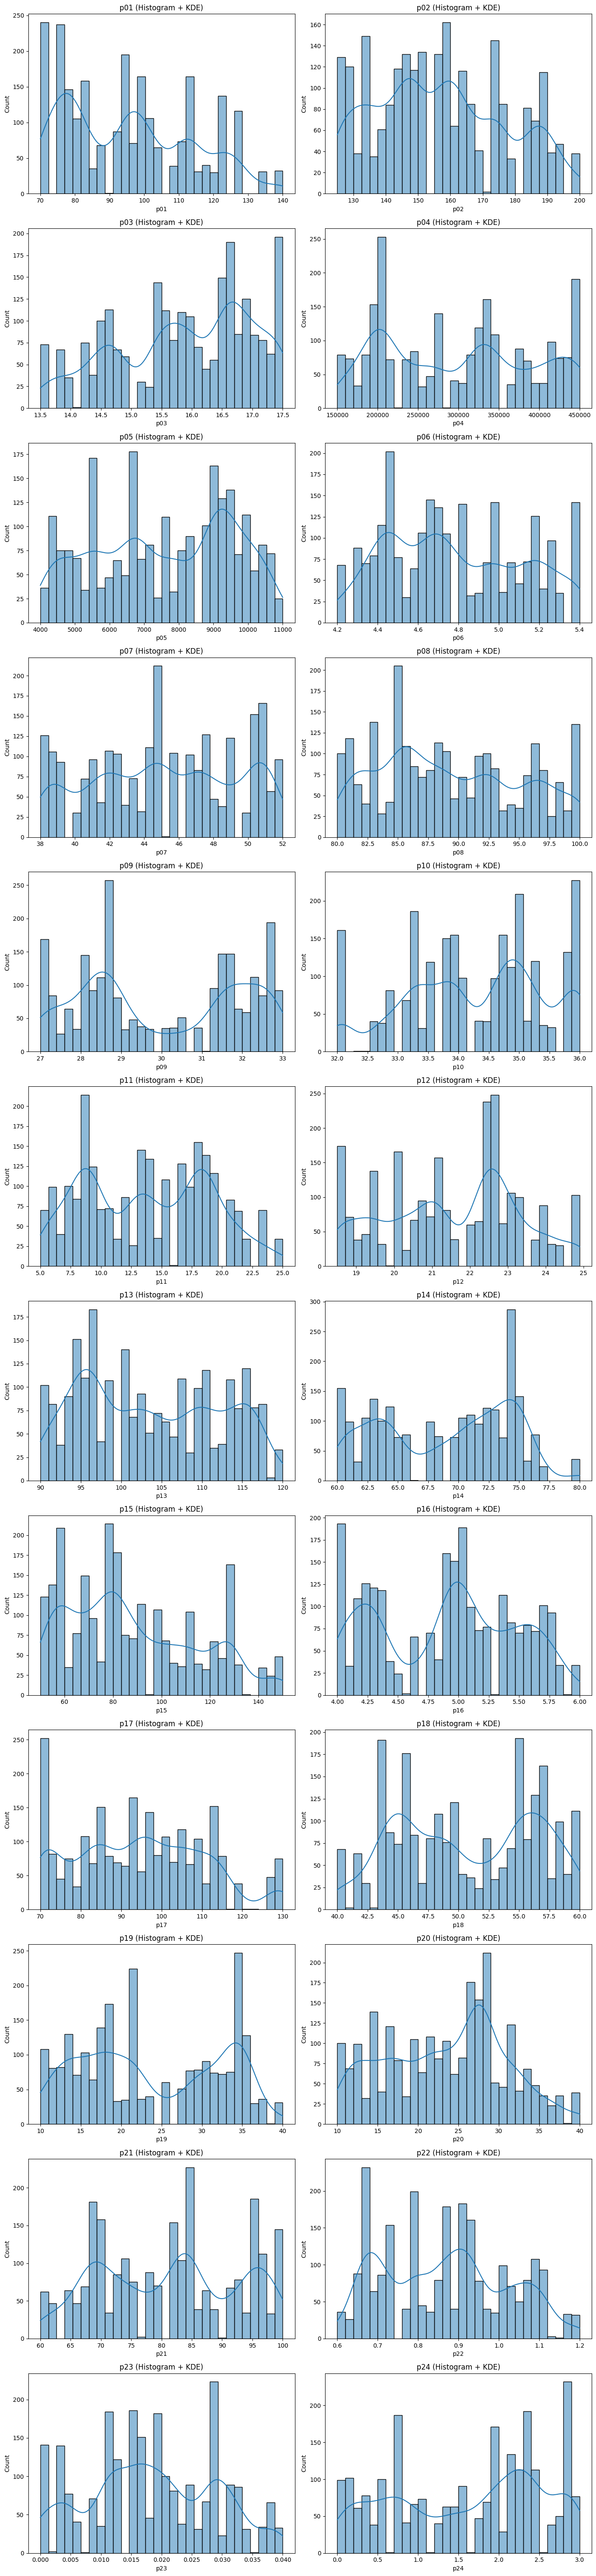

In [ ]:
import math

numeric_cols = df.select_dtypes(include='number').columns
n = len(numeric_cols)
rows = math.ceil(n / 2)

plt.figure(figsize=(14, 5 * rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 2, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"{col} (Histogram + KDE)")

plt.tight_layout()
plt.show()


# ✅ 1. Almost all variables show a multi-modal distribution

# Many KDE curves have multiple peaks, not a single smooth bell curve.

# This means:

# The data may contain sub-populations / clusters.

# Variables are not normally distributed.

# Variables may be influenced by categorical factors (e.g., region, category, type) even if those variables are continuous.

# Consequence for modeling:
# Algorithms that assume normality (e.g., Linear Discriminant Analysis, some parametric tests) may not perform well.
# Tree-based ML models (RF, XGBoost) will handle this easily.

# ✅ **2. Many variables are uniform-like or flat

# Several histograms + KDE curves show near-flat distributions.

# This indicates:

# Low inherent structure in that variable.

# That variable may have low predictive power.

# These features could be noise in the dataset.

# Consequence:
# Use feature importance (RF, logistic regression coef_, permutation importance) to confirm which ones to keep.

# ✅ **3. Some variables show clear right-skew or left-skew

# A number of variables (p04, p05, p15, p21 etc.) show skewed distributions.

# This tells you:

# Many variables are not symmetric.

# You may consider transformations (log/box-cox) when training linear models.

# Consequence:
# For logistic regression or SVM with linear kernel, applying log scaling could improve model performance.

# ✅ 4. Very few variables show a smooth, bell-shaped KDE

# Almost none of your variables look normally distributed.

# This is common in real-world datasets.

# Conclusion:
# Standard parametric assumptions (normality, homoscedasticity) do NOT hold.

# This justifies the use of:

# RandomForest

# XGBoost

# SVC

# Neural networks

# These models handle non-normal continuous features well.

# ✅ 5. Some variables show long tails / outliers

# You can see KDE "tails" stretching far in many variables.

# This means:

# Potential outliers are present.

# Variance is not uniform.

# Standardization/normalization is mandatory before distance-based models (SVM, NN, KNN).

# Consequence:
# Before training SVM/NN → scale your data (StandardScaler).

# ✅ 6. Different variables show different ranges

# Some are extremely wide (p04 income-like variable, p05 expenditure-like variable).
# Some are extremely narrow (p23, p24).

# This implies:

# Variables exist on very different scales.

# Again, scaling is required before logistic regression, SVC, or neural networks.

# 🎯 Overall Conclusions You Can Write in Your Assignment

# Here is a ready-to-use paragraph:

# The KDE + histogram plots for the continuous variables (p01–p24) show that the data is not normally distributed. Several variables exhibit multimodal patterns, suggesting the presence of sub-populations or latent clusters. Many distributions are highly skewed (positively or negatively), while others appear relatively flat, indicating low information content. Outliers and long-tailed distributions are visible in multiple variables. The lack of normality and the heterogeneous spread across features justify the use of scaling techniques (e.g., StandardScaler) and algorithms that do not assume Gaussian distributions, such as RandomForest, SVC with RBF kernel, and neural networks.

# 🎯 Actionable ML Preprocessing Steps Based on KDE

# Based on the shapes you showed, do the following:

# ✔ Must-do

# StandardScaler before SVM or neural networks

# Check for outliers (IQR or z-score)

# Consider log transform for heavily skewed features

# Feature selection may be needed (some variables are very noisy)

# ✔ Optional but recommended

# Try PCA (non-Gaussian data benefits from dimensionality reduction)

# Try clustering (KMeans / GMM) because of the multimodal patterns

# Use non-linear models (RF, XGBoost, NN) for better performance

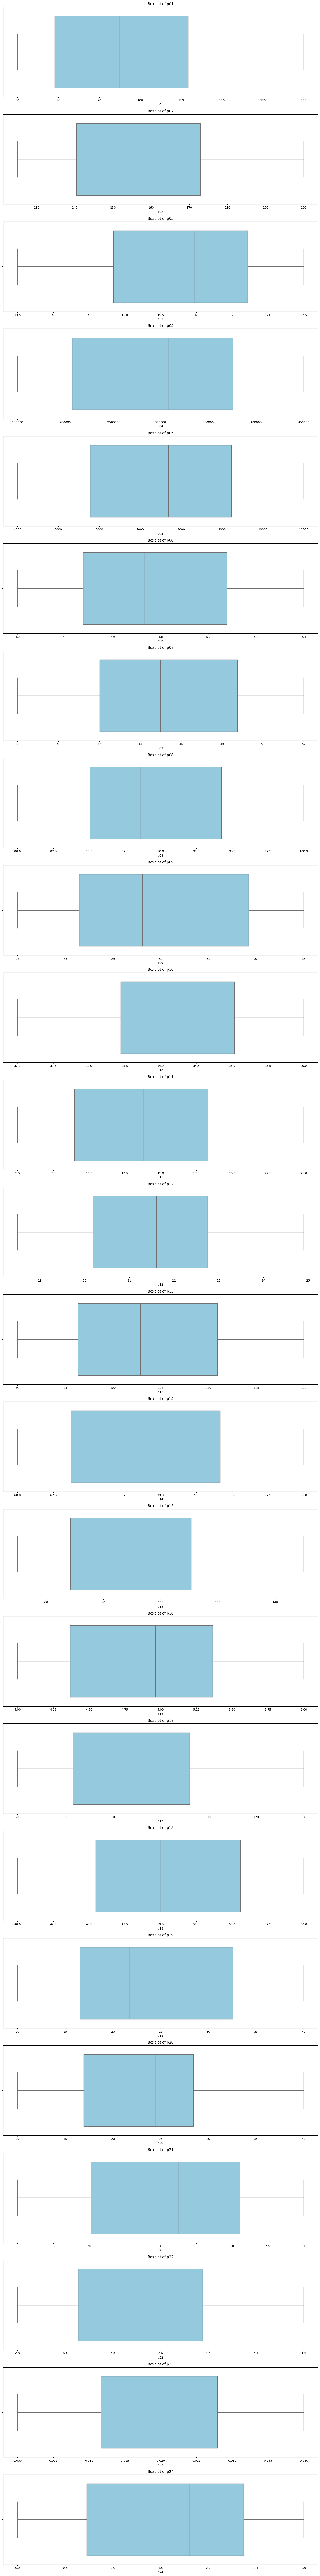

In [5]:
numeric_cols = df.select_dtypes(include=np.number).columns
n = len(numeric_cols)

plt.figure(figsize=(15, 5 * n))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n, 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


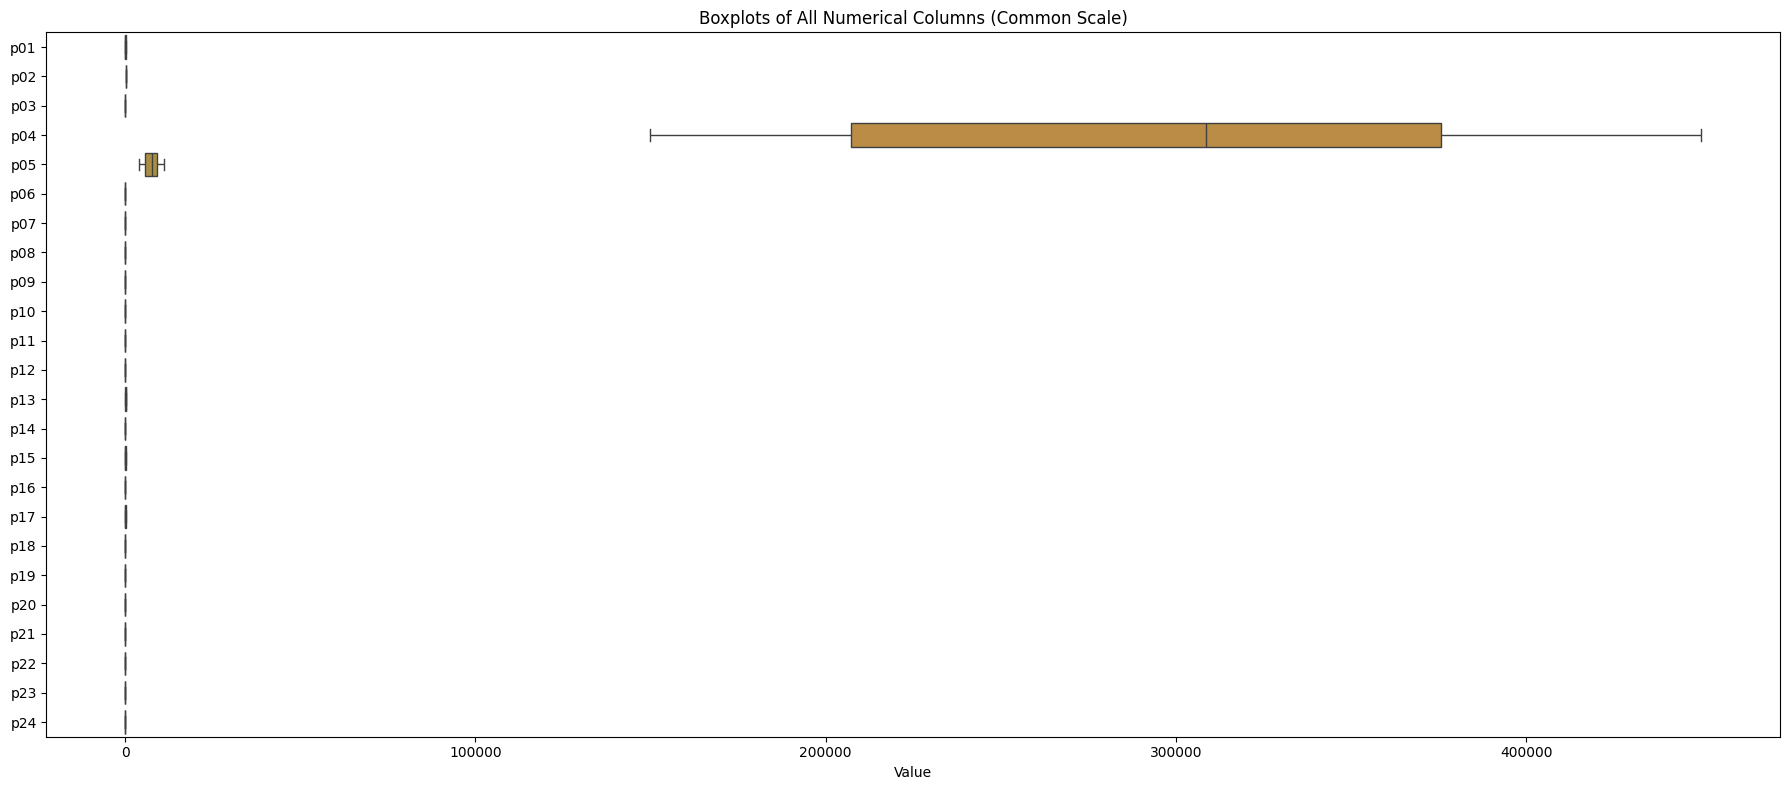

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(18, 8))
sns.boxplot(data=numeric_df, orient='h')
plt.title("Boxplots of All Numerical Columns (Common Scale)")
plt.xlabel("Value")
plt.tight_layout()
plt.show()




# 1️⃣ One feature (p04) completely dominates the scale

# You can clearly see:

# p04 has values in the hundreds of thousands

# All other variables are very small relative to p04

# Because of this, every other feature is squeezed into a tiny vertical line at the left side
# → you cannot visually see their distributions at all

# This is the key observation.

# 2️⃣ The dataset has extreme scale imbalance

# A healthy dataset usually has features on comparable numeric ranges.
# Your dataset does not:

# p04 is extremely large

# p05 is moderately large

# Everything else has values close to the origin

# This means the dataset contains features measured in drastically different units.

# 3️⃣ The plot reveals massive scaling issues

# Without scaling:

# Large-scale features (like p04) will dominate ML models

# Small-scale features (like p01, p02, p03, p06…p24) will have almost no impact

# Distance-based models (SVM, kNN, Neural Networks) will perform very poorly

# Even logistic regression can be distorted when one feature has extremely large magnitude.

# 4️⃣ Outliers may exist in p04, but cannot see them in other features

# Because everything is compressed near zero, you cannot observe:

# outliers

# skewness

# spread

# IQR differences

# for the other variables, since they are drowned out by p04’s huge range.

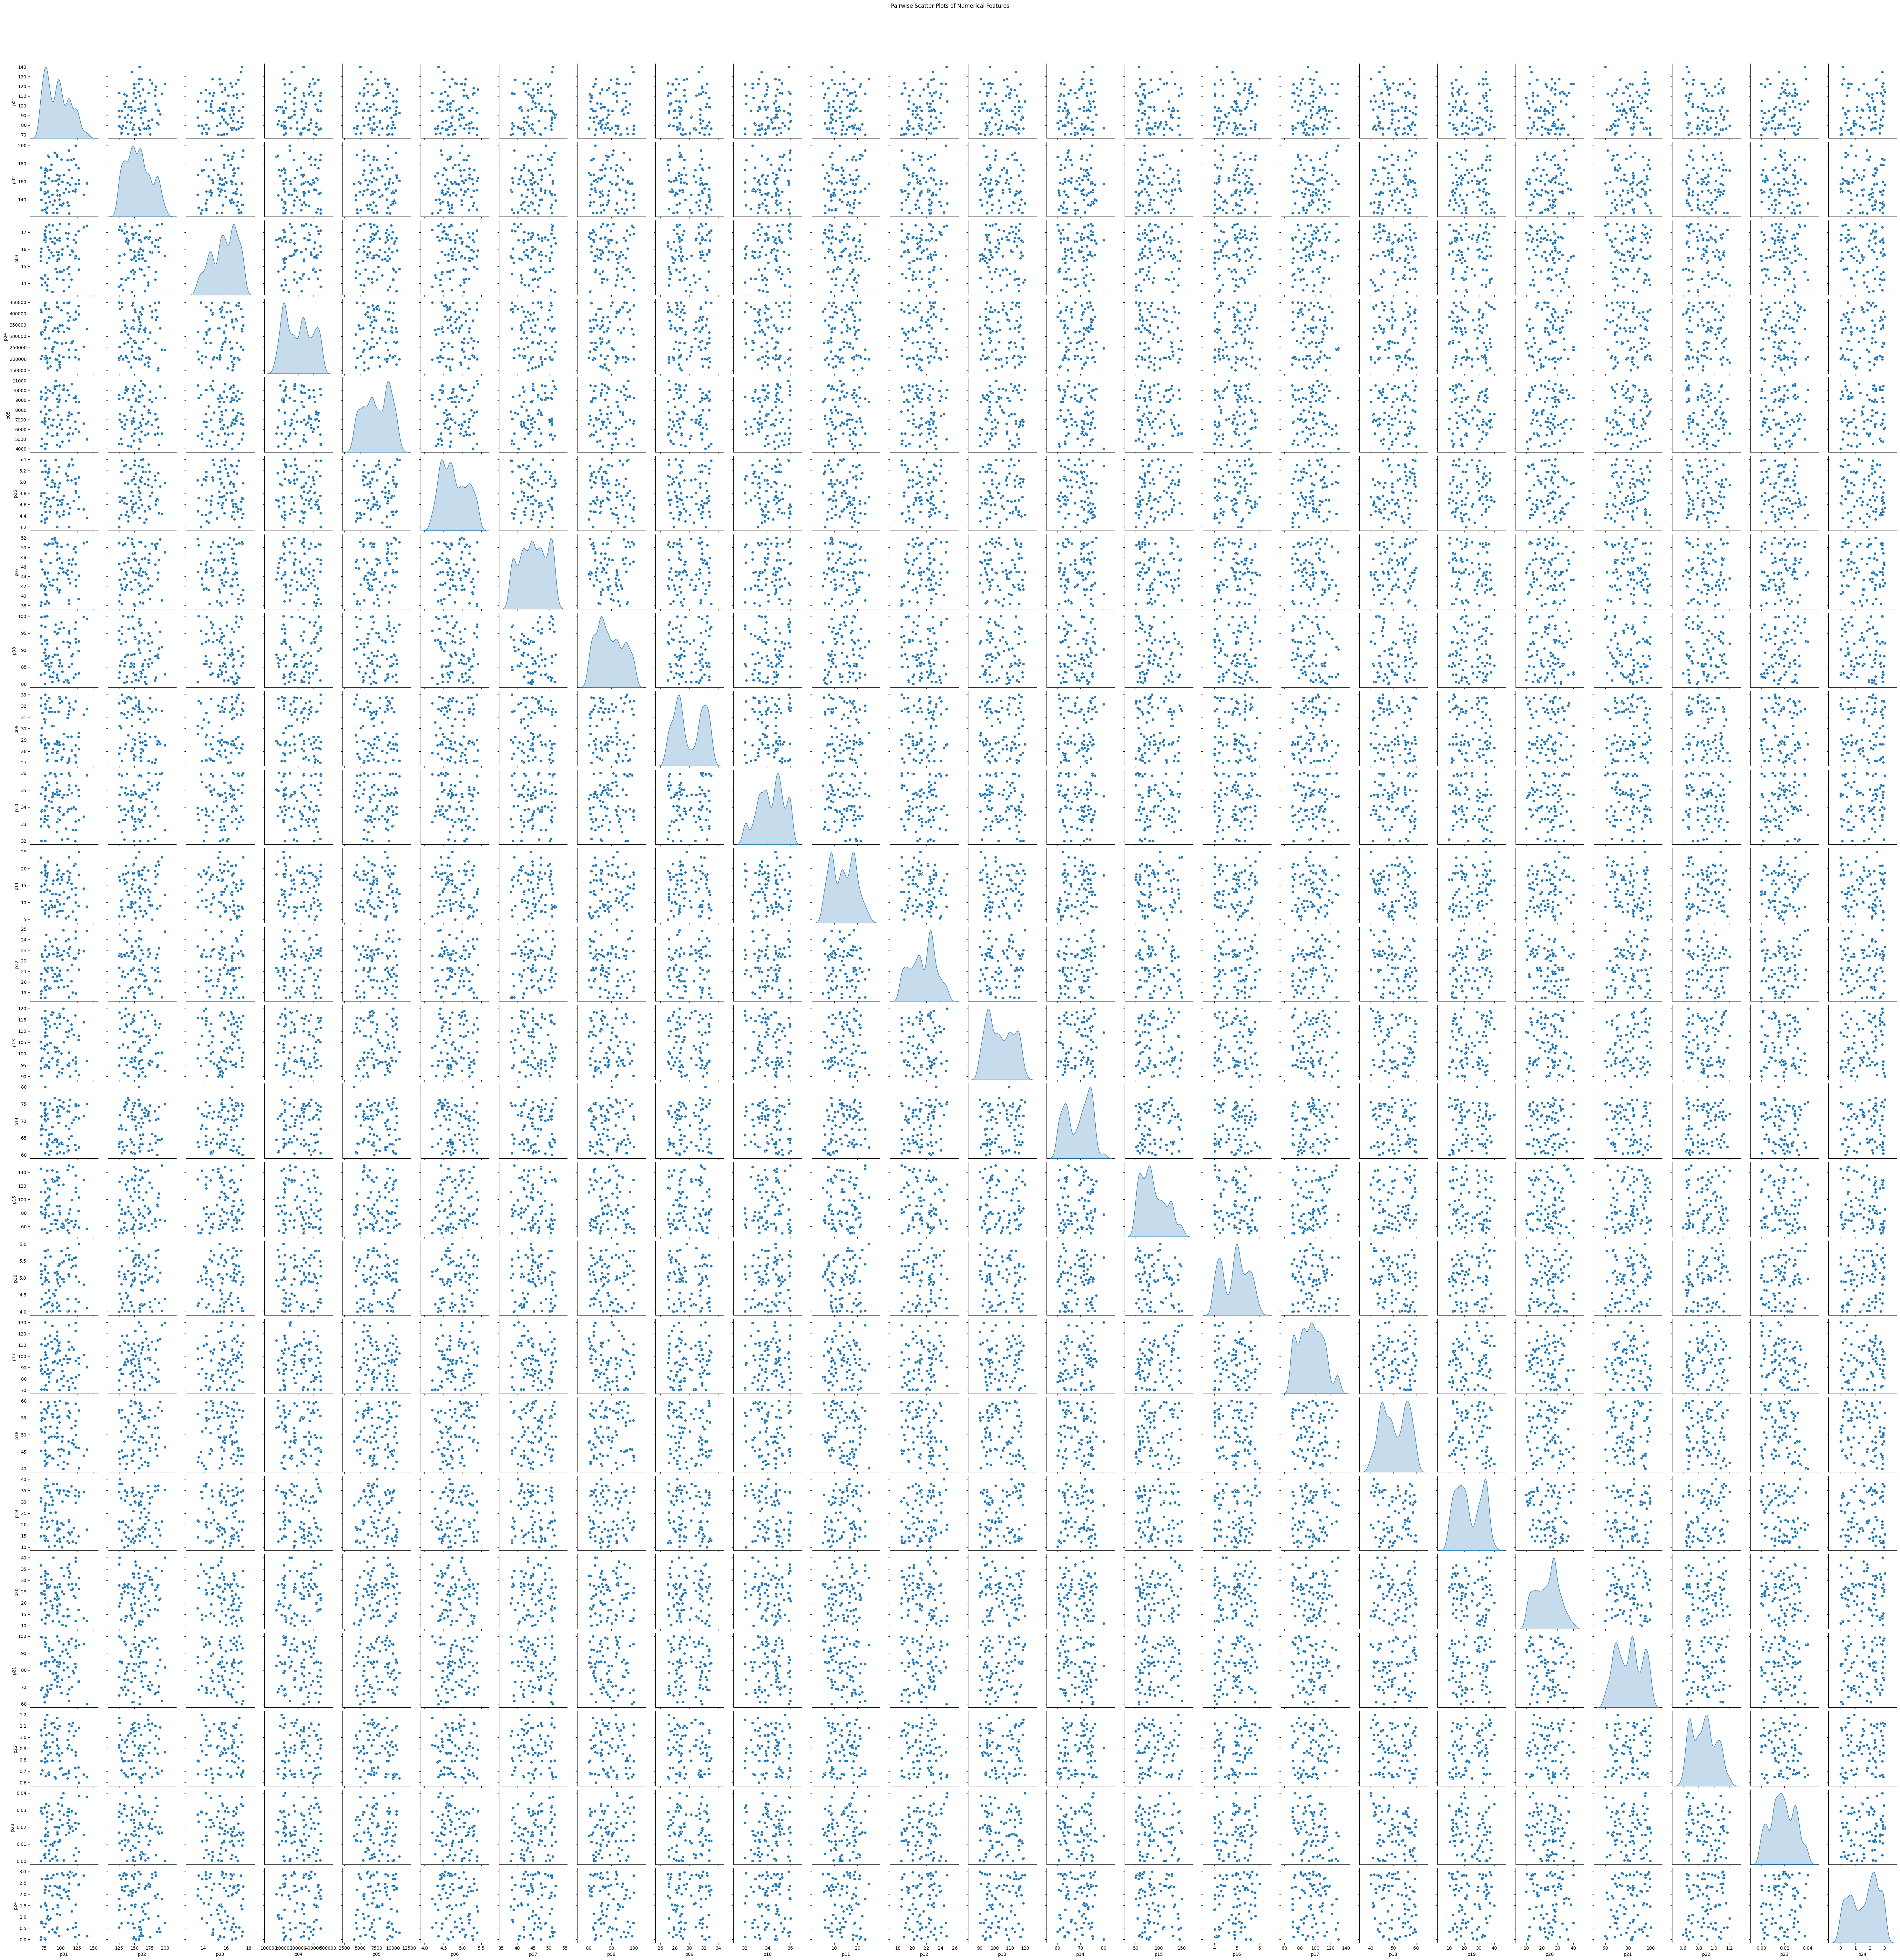

In [4]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Optional: sample for speed
sampled_df = numeric_df.sample(n=2000, random_state=42)

sns.pairplot(sampled_df, diag_kind="kde")
plt.suptitle("Pairwise Scatter Plots of Numerical Features", y=1.02)
plt.show()


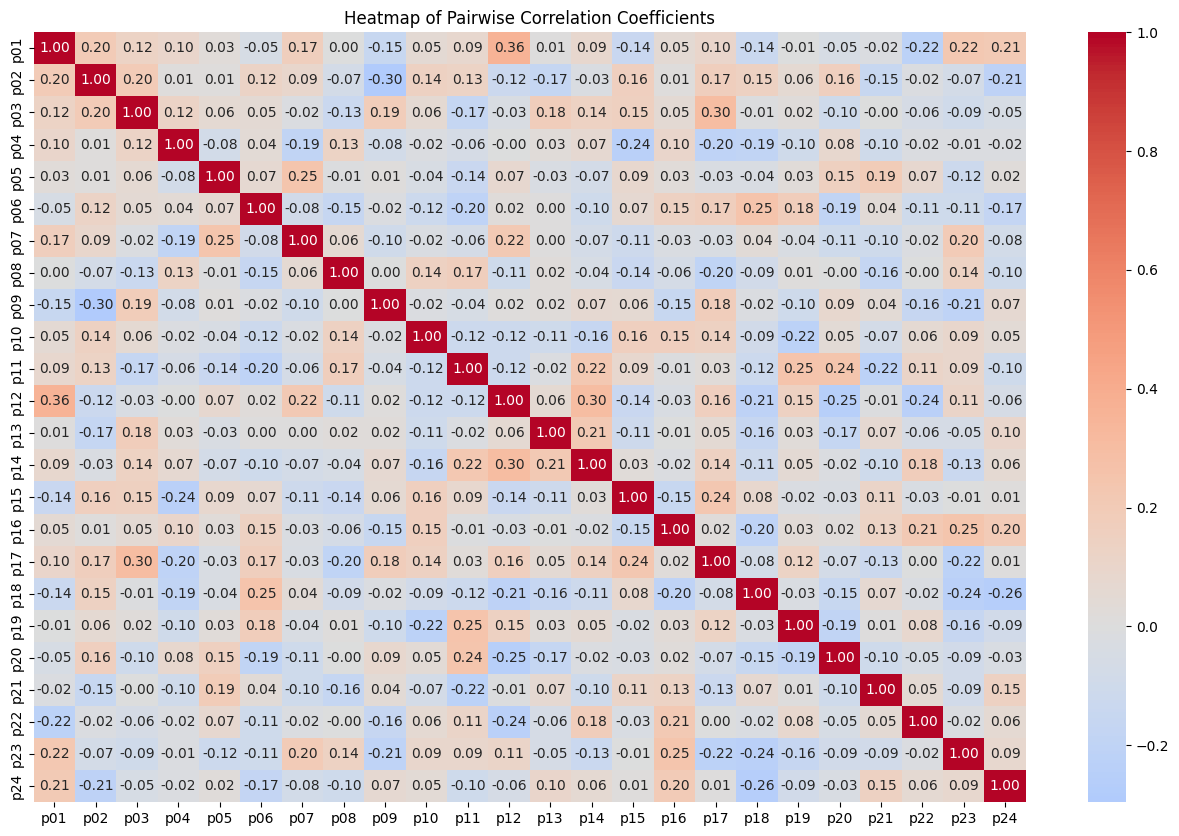

In [ ]:
plt.figure(figsize=(16, 10))
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Heatmap of Pairwise Correlation Coefficients")
plt.show()